In [2]:
import sys
import numpy as np
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [ ]:
DATABASE_NAME = "/home/ubuntu/UPS2_allion/UPS2_allion.sqlite"

# Connect to the database file
conn = sqlite3.connect(DATABASE_NAME)
c = conn.cursor()
c.execute("select intensity from frames where frame_id in (select frame_id from frame_properties where collision_energy=31.5)")
intensity_v = np.array(c.fetchall(), dtype=np.float32)
intensity_v.shape = (len(intensity_v),)
conn.close()

ecdf = sm.distributions.ECDF(intensity_v)

MemoryError: 

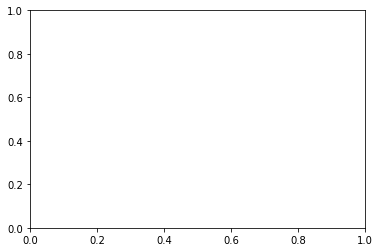

In [5]:
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.xlabel('intensity')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.title("MS2 Raw Intensity ECDF")
plt.subtitle("(Empirical Cumulative Distribution Function")
plt.show()